# Patchouris analysis notebook
'''Documentation about the task here'''

### Imports  
All functions are in behavior_analysis_functions.py

In [1]:
import os
import gc
import glob
import time
from behavior_analysis_functions import list_sessions_analyzed, \
                                    process_session, html_mouse, MOUSE_STRING


### Get mice data
Define root, get mice list and session for each mouse

In [2]:
# Root of all mice data
# root: str = 'C:'+os.sep+'Users'+os.sep+'MORVAN'+os.sep+'Documents'+os.sep+'patchouris'+os.sep+'Sample_Data'+os.sep
# root: str = '/home/david/Documents/Code/ForagingProject/Patchouris/patchouris/Sample_Data/'
root: str = '/home/david/MyLocalData/Maud/'

# List all mice in the root folder
mouse_list: list[str] = [os.path.basename(path) for path in glob.glob(root+"/MOU*")]
print(f'Found {len(mouse_list)} {"mice" if len(mouse_list)>1 else "mouse"} in the root folder:')

session_list: dict[str, list[str]] = {}
for mouse in mouse_list:
    mouse_folder = root + mouse
    session_list[mouse] = [name for name in os.listdir(mouse_folder)
                            if os.path.isdir(os.path.join(mouse_folder, name))
                            and name.startswith('MOU')]
    nb_sessions: int = len(session_list[mouse])
    print(f'{MOUSE_STRING}  ~Hello, I\'m {mouse}! I have foraged for {nb_sessions} sessions.')
    print(session_list[mouse], '\n')

mouse_list: list[str] = ["MOU4519"]  # For testing

Found 44 mice in the root folder:
---{,_,">  ~Hello, I'm MOU4192! I have foraged for 62 sessions.
['MOU4192_20230725-1210', 'MOU4192_20230731-1628', 'MOU4192_20230712-1723', 'MOU4192_20230803-1126', 'MOU4192_20230802-1212', 'MOU4192_20230718-1541', 'MOU4192_20230711-1727', 'MOU4192_20230719-1535', 'MOU4192_20230720-1648', 'MOU4192_20230712-1235', 'MOU4192_20230717-1037', 'MOU4192_20230719-1027', 'MOU4192_20230724-1137', 'MOU4192_20230710-1218', 'MOU4192_20230721-1017', 'MOU4192_20230724-1639', 'MOU4192_20230804-1130', 'MOU4192_20230801-1642', 'MOU4192_20230708-1201', 'MOU4192_20230713-1155', 'MOU4192_20230808-1154', 'MOU4192_20230805-1904', 'MOU4192_20230730-1011', 'MOU4192_20230725-1706', 'MOU4192_20230713-1706', 'MOU4192_20230717-1607', 'MOU4192_20230804-1718', 'MOU4192_20230709-1234', 'MOU4192_20230706-1506', 'MOU4192_20230722-1925', 'MOU4192_20230808-1740', 'MOU4192_20230803-1645', 'MOU4192_20230809-1156', 'MOU4192_20230723-1503', 'MOU4192_20230810-1722', 'MOU4192_20230807-1216', '

### Process sessions

Processing MOU4519
MOU4519, session 1 out of 1

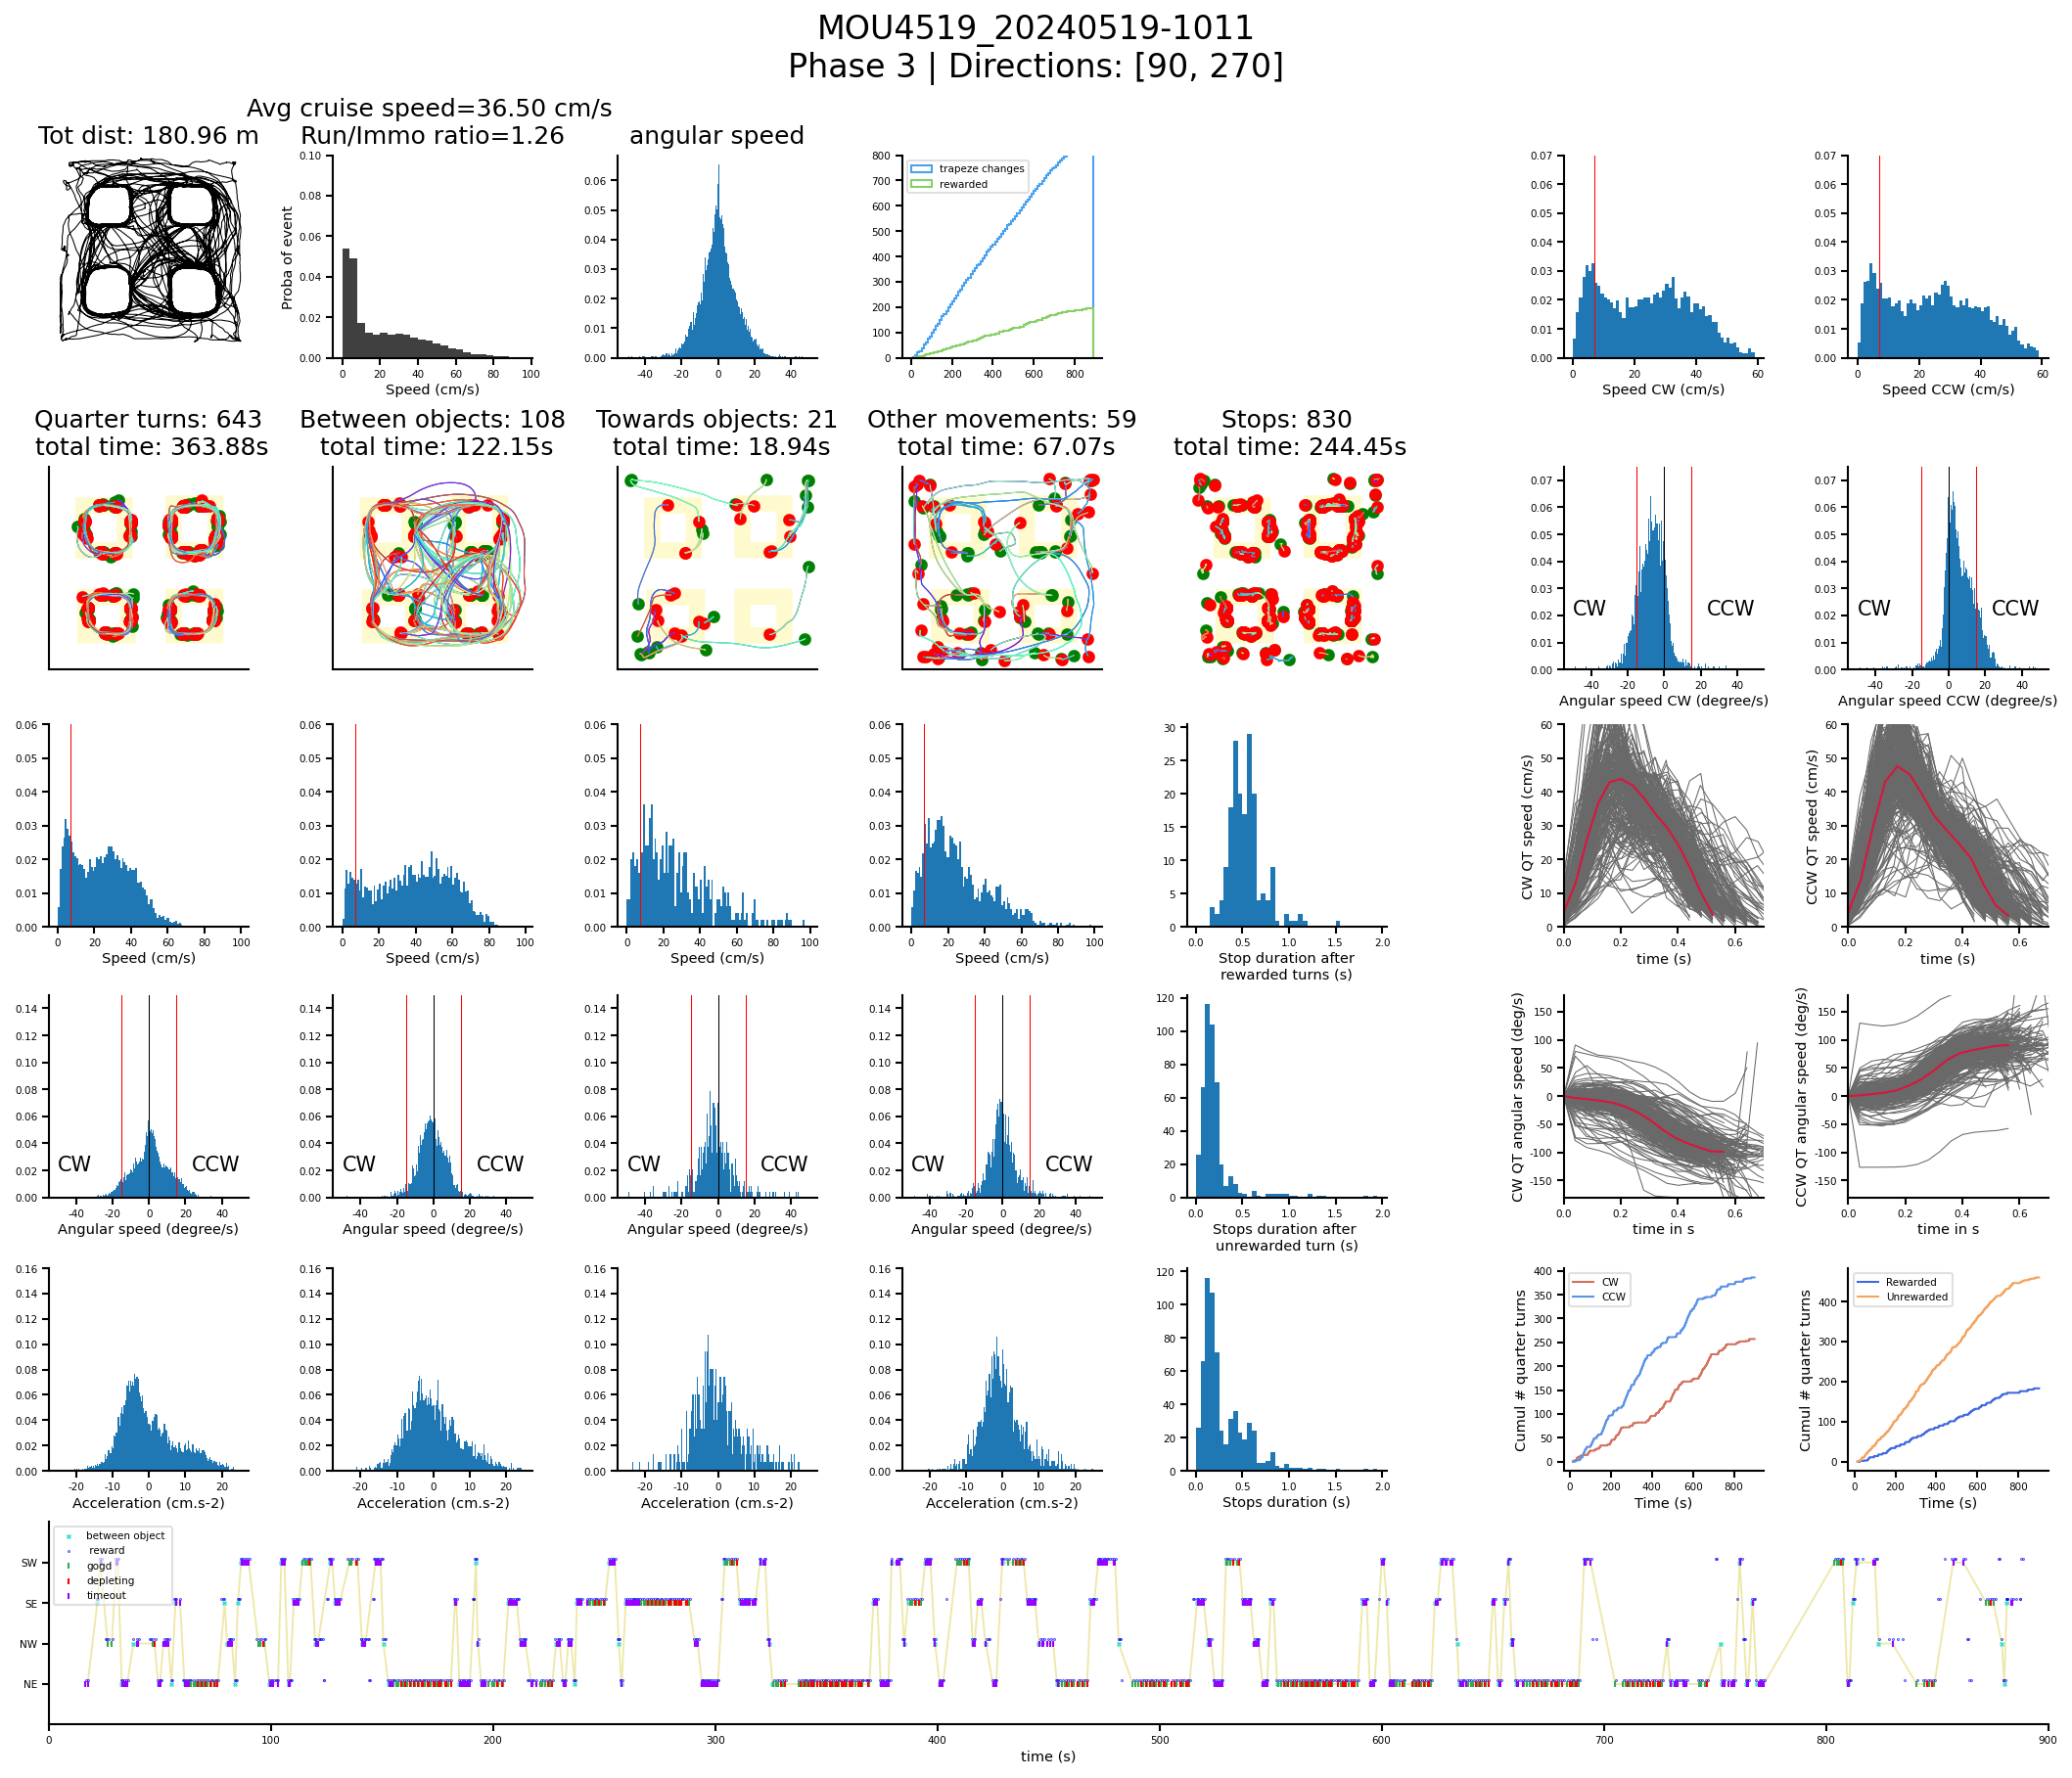

 processed in 44.4 seconds


In [3]:
for mouse in mouse_list:
    print(f"Processing {mouse}")

    # Define and create analysis folder if it doesn't exist
    analysis_folder: str = root + os.sep + mouse + os.sep + "Analysis"
    if not os.path.exists(analysis_folder):
        os.mkdir(analysis_folder)

    # Check and get list of analyzed sessions for this mouse
    txt: str = analysis_folder + os.sep + "ListSessionsAnalyzed.txt"
    listSessionAnalyzed: list[str] = list_sessions_analyzed(txt)

    # Process each session of the mouse if it is not in the list of analyzed 
    # sessions and write the session name in the list of analyzed sessions.
    # process_session() analyzes the session and saves the results
    # and figure in the Analysis folder.
    for i, session in enumerate(session_list[mouse]):
        print(f"{mouse}, session {i + 1} out of {len(session_list[mouse])}", end="")
        start_time: float = time.time()
        process: bool = False if session_list[mouse][i] in listSessionAnalyzed else True
        process: bool = True  # Forcing processing of all sessions
        process_session(root+mouse, session, process=process)
        if process:
            with open(txt, "a", encoding="utf-8") as f:
                # write the session name in the list of analyzed sessions if it is not already there
                if session not in listSessionAnalyzed:
                    f.write(session + "\n")
        gc.collect()
        print(f" processed in {time.time() - start_time:.1f} seconds")

    # Create html file with all sessions for this mouse
    html_mouse(root, mouse)